# Predict Fully Paid Loan and Charge Out Loan in Machine Learning

In [2]:
import pandas as pd
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Preprocessing before EDA

In [5]:
remove = ['Unnamed: 0',
          'id',
          'desc',
          'url',
          'annual_inc_joint',
          'dti_joint',
          'verification_status_joint',
          'open_acc_6m',
          'open_il_6m',
          'open_il_12m',
          'open_il_24m',
          'mths_since_rcnt_il',
          'total_bal_il',
          'il_util',
          'open_rv_12m',
          'open_rv_24m',
          'max_bal_bc',
          'all_util',
          'inq_fi',
          'total_cu_tl',
          'inq_last_12m',
          ]
df2 = df.drop(columns=remove)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_title                    438697 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float64
 13 

In [6]:
df2.to_csv('Loandata_filtered.csv')

In [7]:
df2.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

In [8]:
# drop column that has a lot of unique value and unnecessary features
remove_unique = ['emp_title',
                 'title',
                 'zip_code',
                 'addr_state',
                 'earliest_cr_line',
                 'application_type',
                 'issue_d',
                 'last_credit_pull_d']
df3 = df2.drop(columns=remove_unique)
df3.shape

(466285, 46)

In [9]:
# Convert the 'date_column' to datetime
datelists = ['last_pymnt_d', 'next_pymnt_d']
for i in datelists:
    df3[i] = pd.to_datetime(df3[i], format='%b-%y')

## Exploratory Data Analysis (EDA)

### Histplot

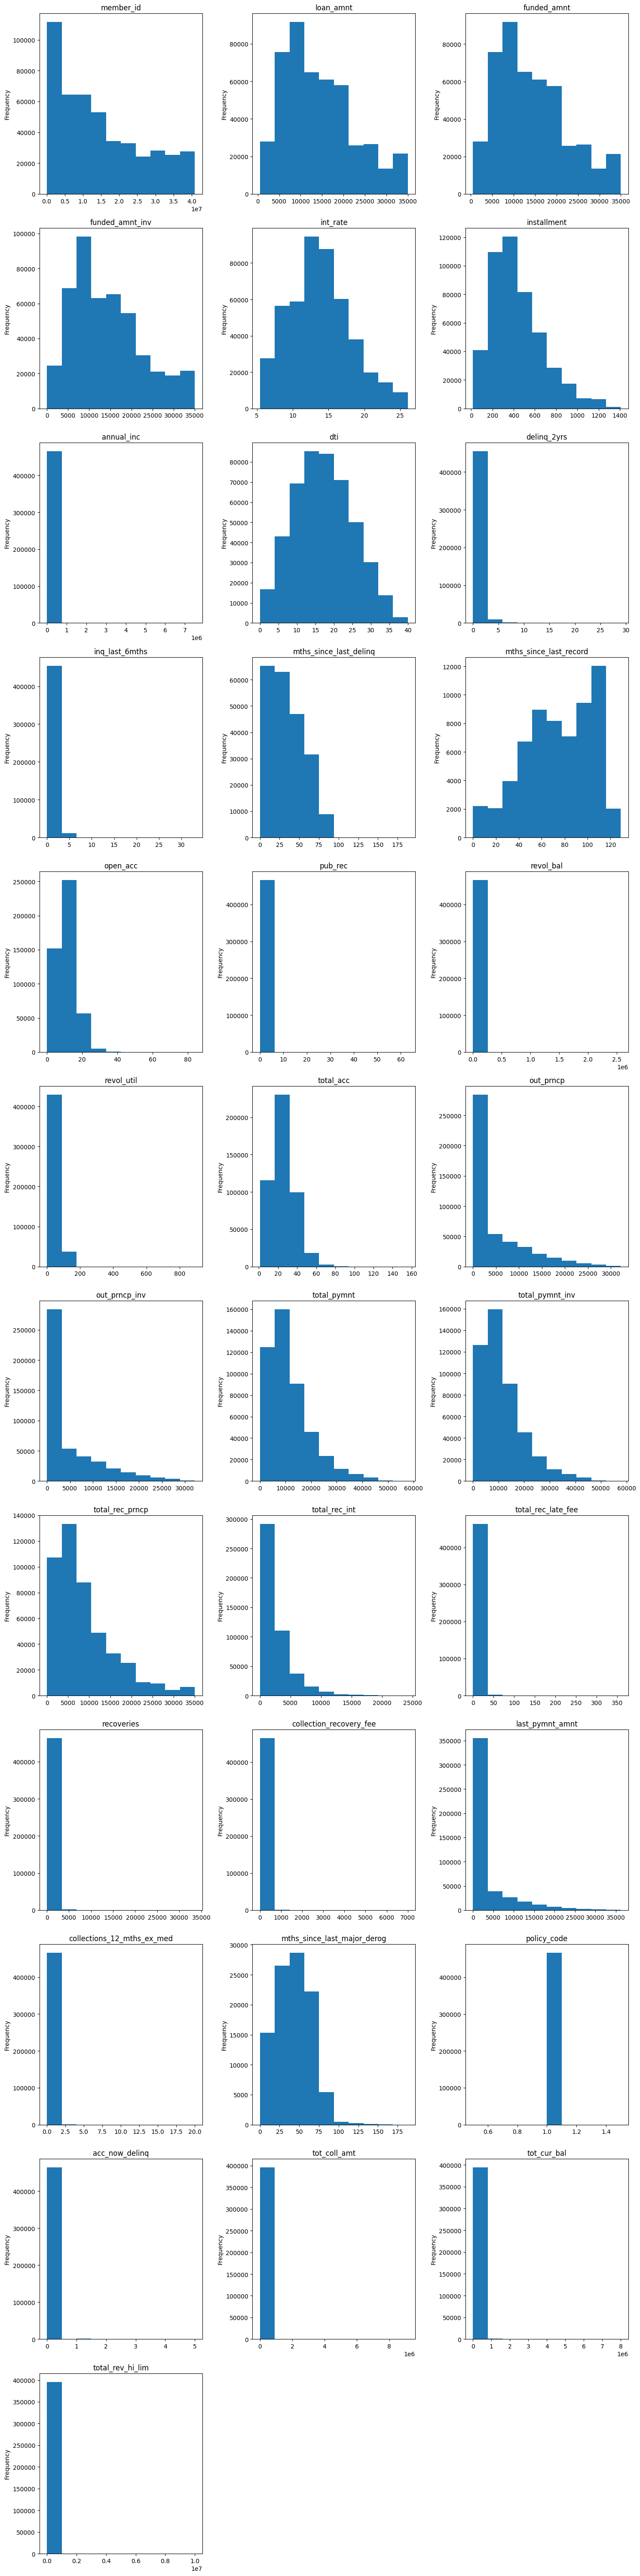

In [10]:
# Get the names of all columns with data type 'int' and 'float'
int_vars = df3.select_dtypes(include=["int", "float"]).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3

# To make sure there are enough rows for the
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Boxplot

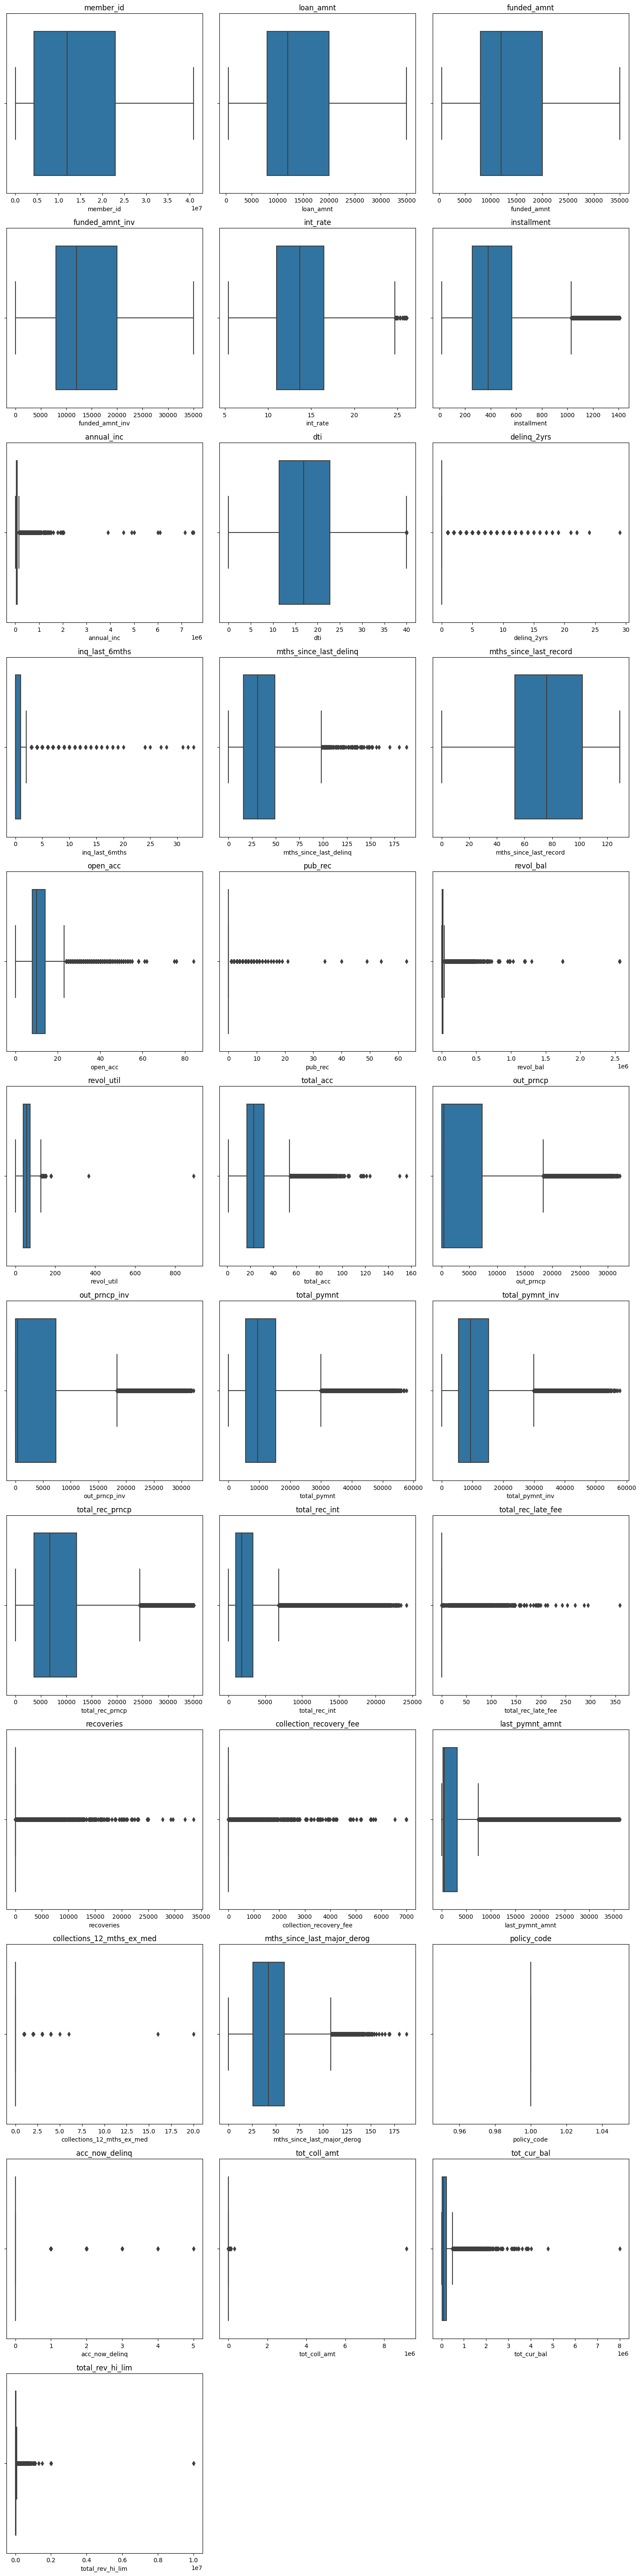

In [11]:
# Get the names of all columns with data type 'int' and 'float'
int_vars = df3.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3 # To make sure there are enough rows for the
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(int_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [12]:
df3.select_dtypes(include='object').nunique()

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
loan_status             9
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

### Barplot

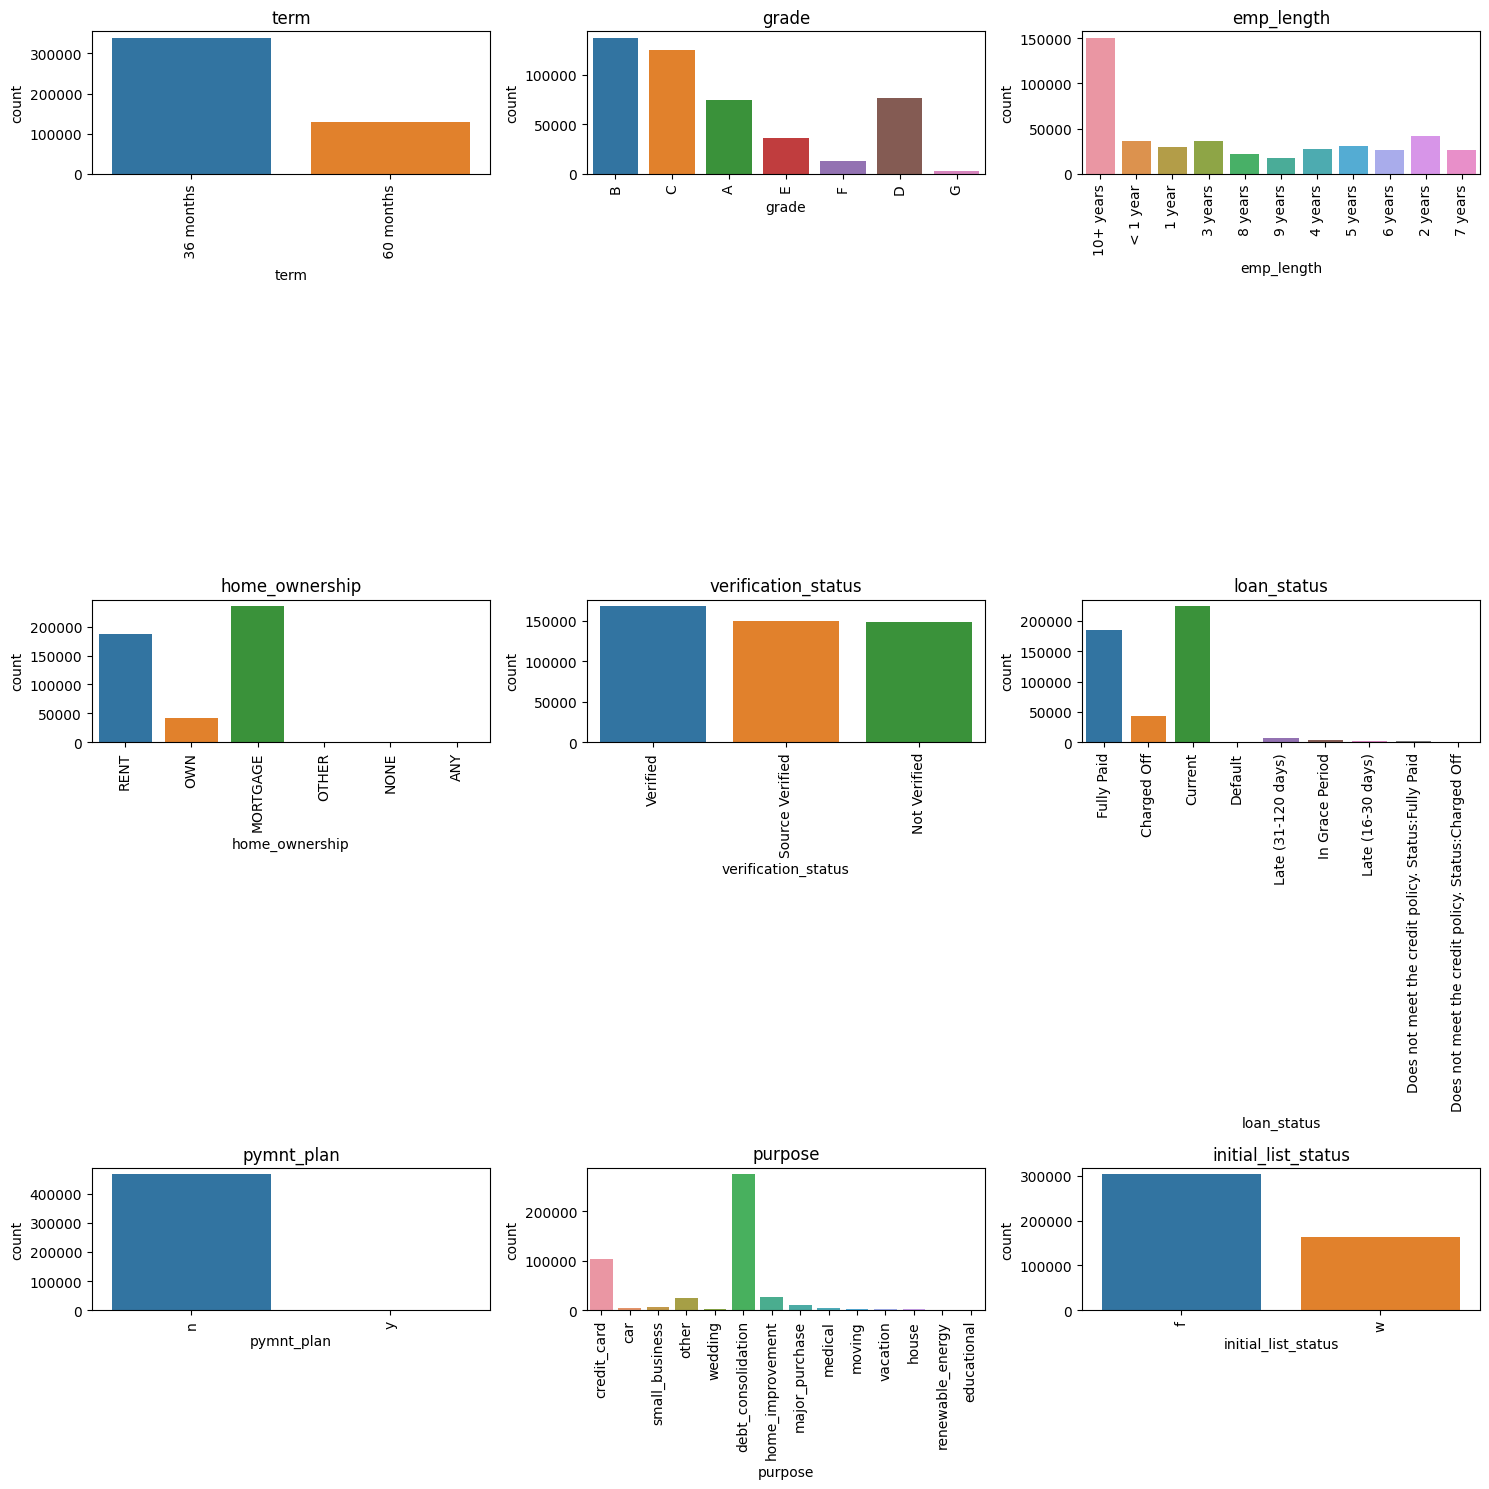

In [13]:
# Get the names of all columns with data type 'object' without date (categorical columns)
cat_vars = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status','loan_status',
             'pymnt_plan', 'purpose', 'initial_list_status']

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df3, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for rea

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

To see the credit risk for customer is by using prediction target that needed. In this case, I'm using **loan_status** that indicates the **Fully Paid** loan and **Charged Off** loan. **Current** has the highest value but this indicates that customer's loan are still not being charged. 

In [14]:
filter = ['Fully Paid', 'Charged Off']
df4 = df3[df3.loan_status.isin(filter) == True]

In [15]:
df4.select_dtypes(include='object').nunique()

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
loan_status             2
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

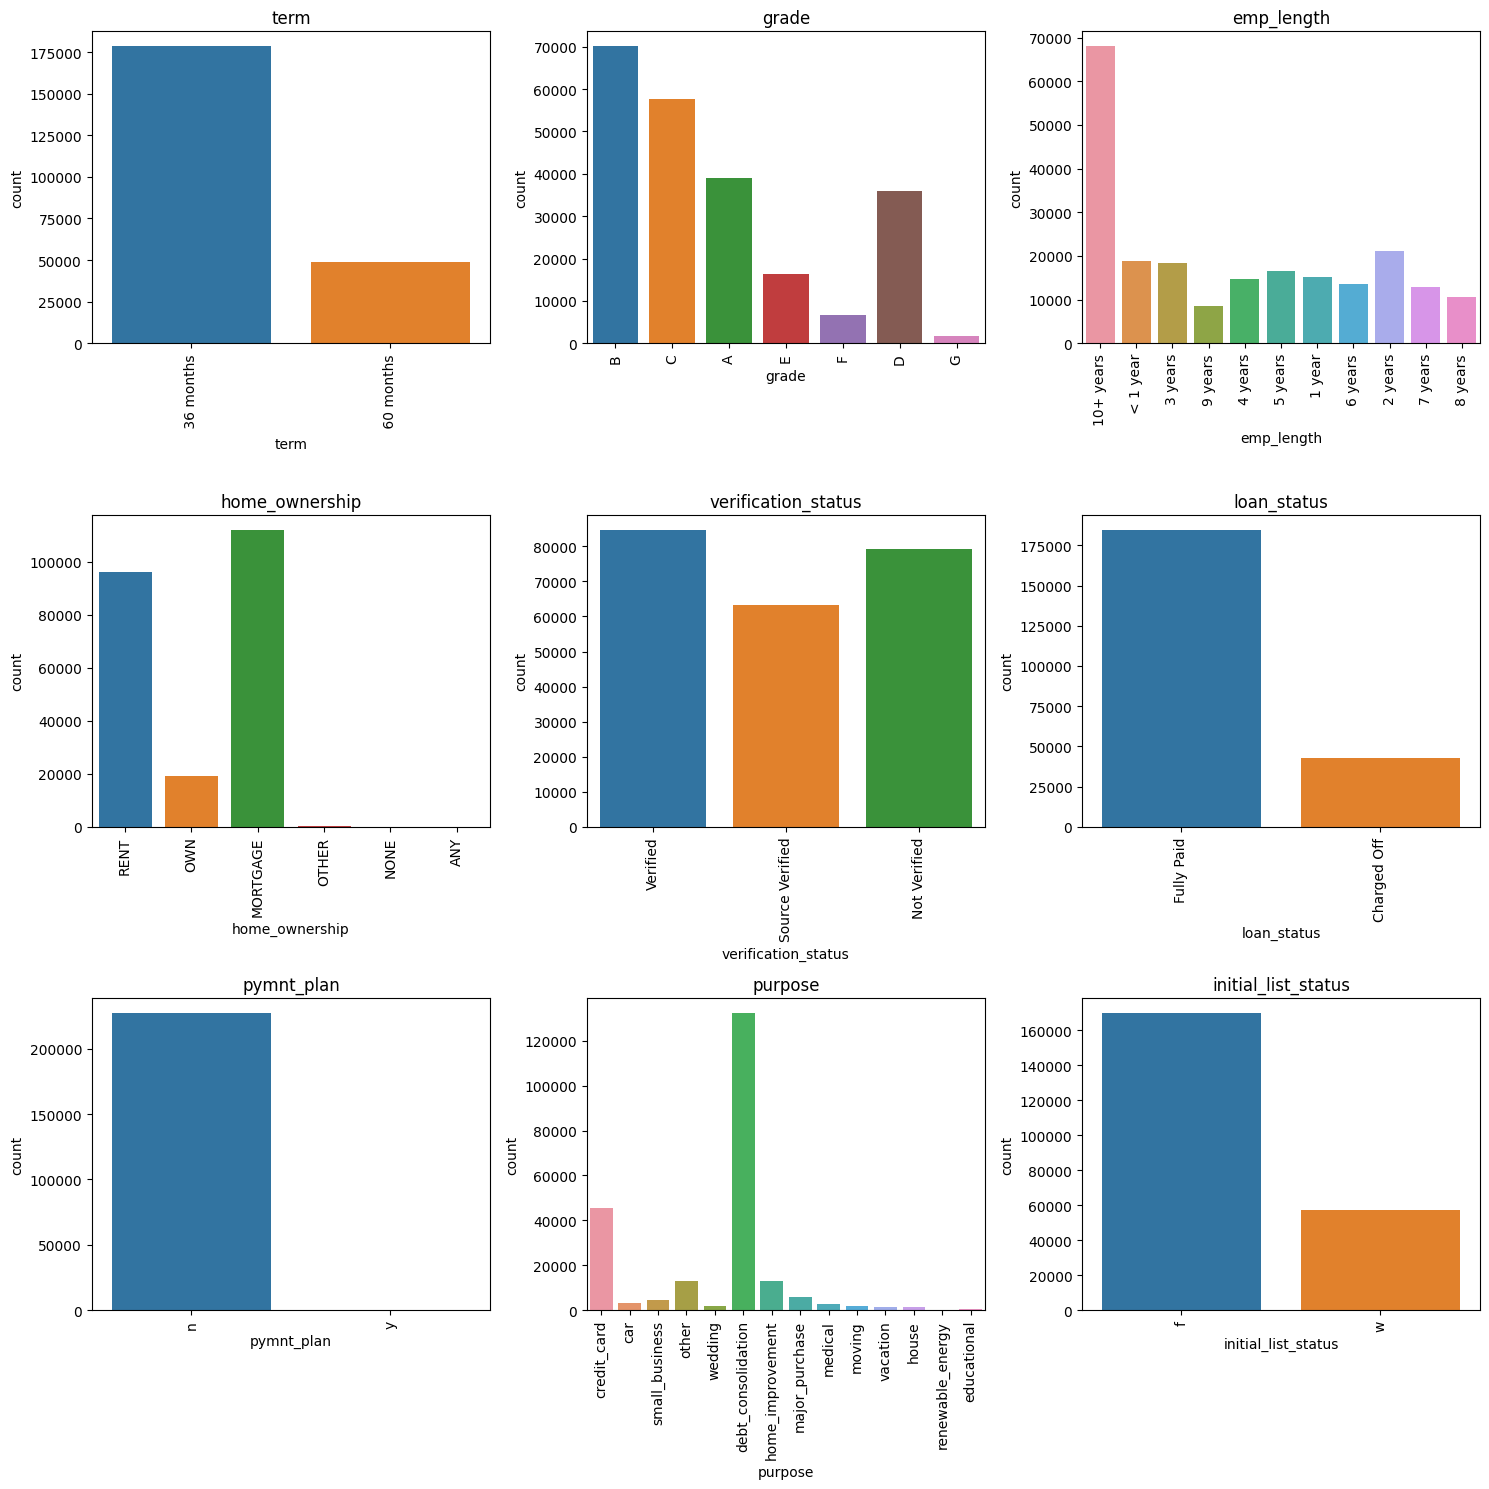

In [16]:
# Get the names of all columns with data type 'object' without date (categorical columns)
cat_vars = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status','loan_status',
             'pymnt_plan', 'purpose', 'initial_list_status']

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df4, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for rea

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [17]:
df4.select_dtypes(include="object").columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'initial_list_status'],
      dtype='object')

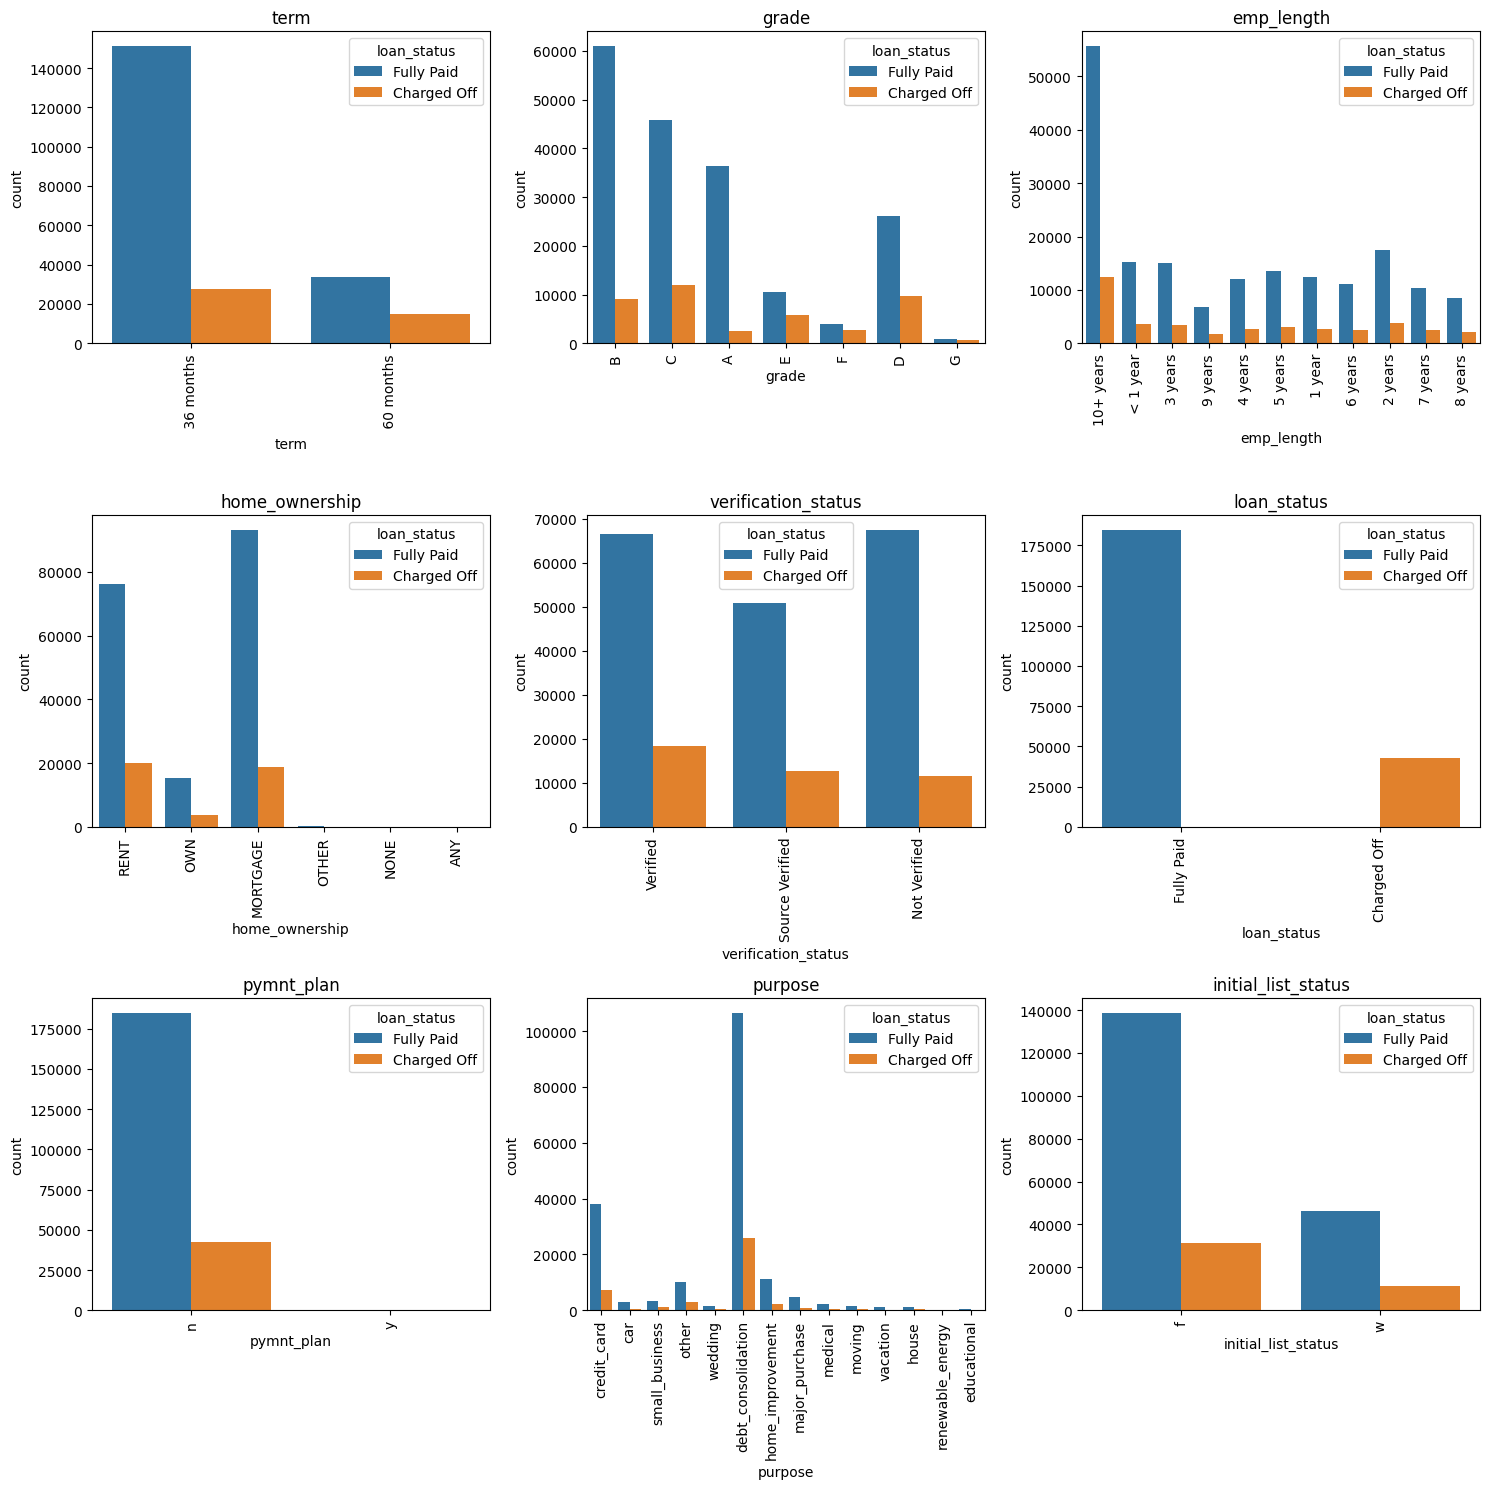

In [18]:
cat_vars = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status','loan_status',
             'pymnt_plan', 'purpose', 'initial_list_status']

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn with 'loan_status' as hue
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='loan_status', data=df4, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90) # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Histplot (with loan_status hue)

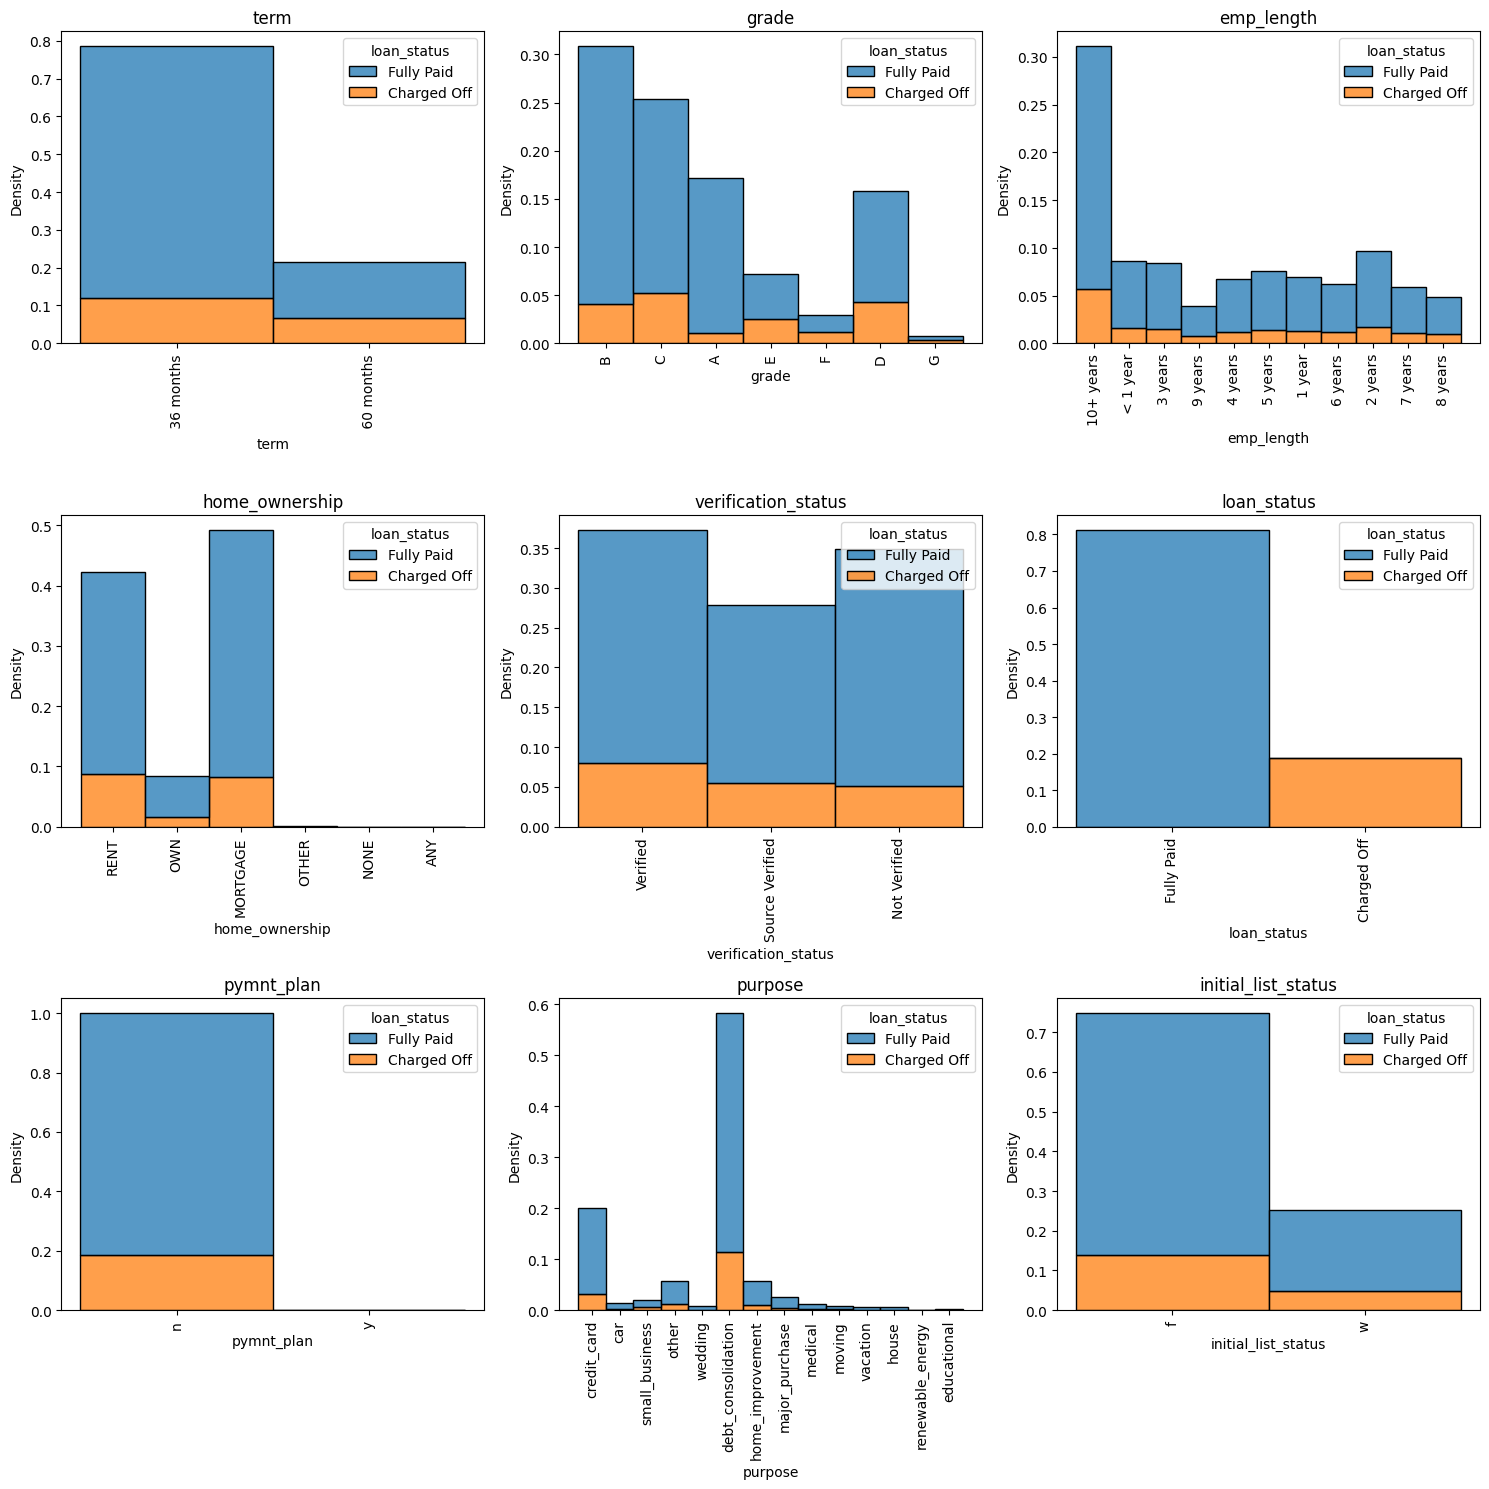

In [19]:
cat_vars = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status','loan_status',
             'pymnt_plan', 'purpose', 'initial_list_status']

# Create the stacked density plot
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(data=df4, x=var, hue='loan_status', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Density')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

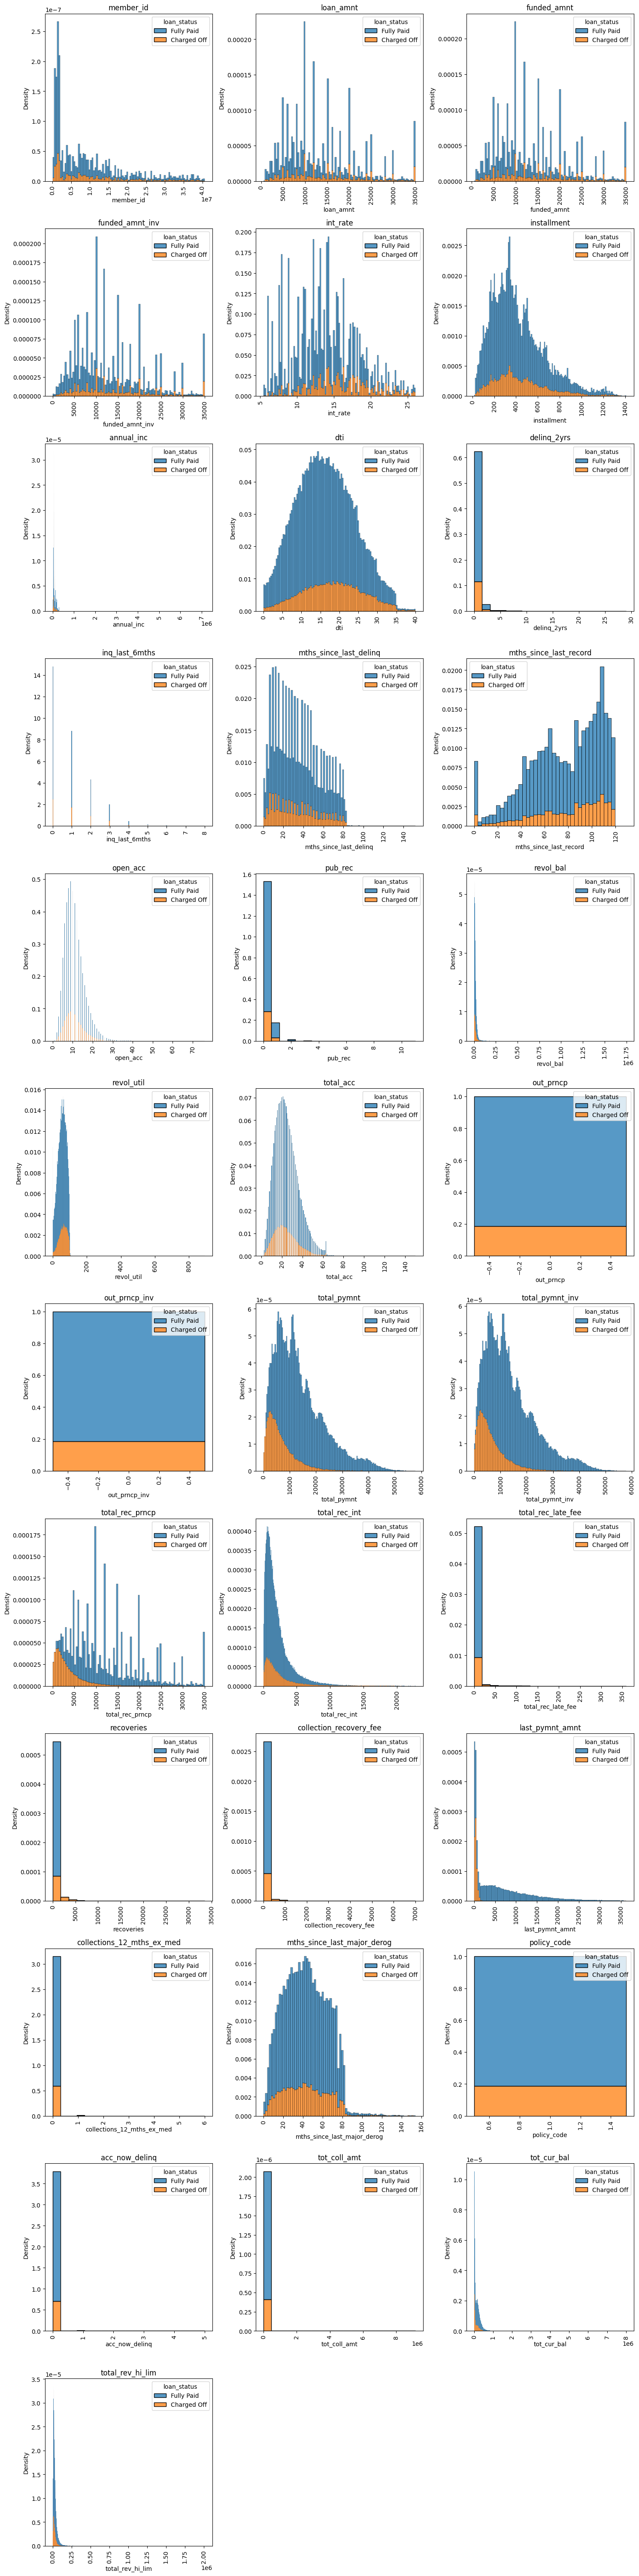

In [20]:
# Get the names of all columns with data type 'int' and 'float'
int_vars = df3.select_dtypes(include=["int", "float"]).columns.tolist()

# Create the stacked density plot
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(int_vars):
    sns.histplot(data=df4, x=var, hue='loan_status', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Density')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Boxplot (with loan_status hue)

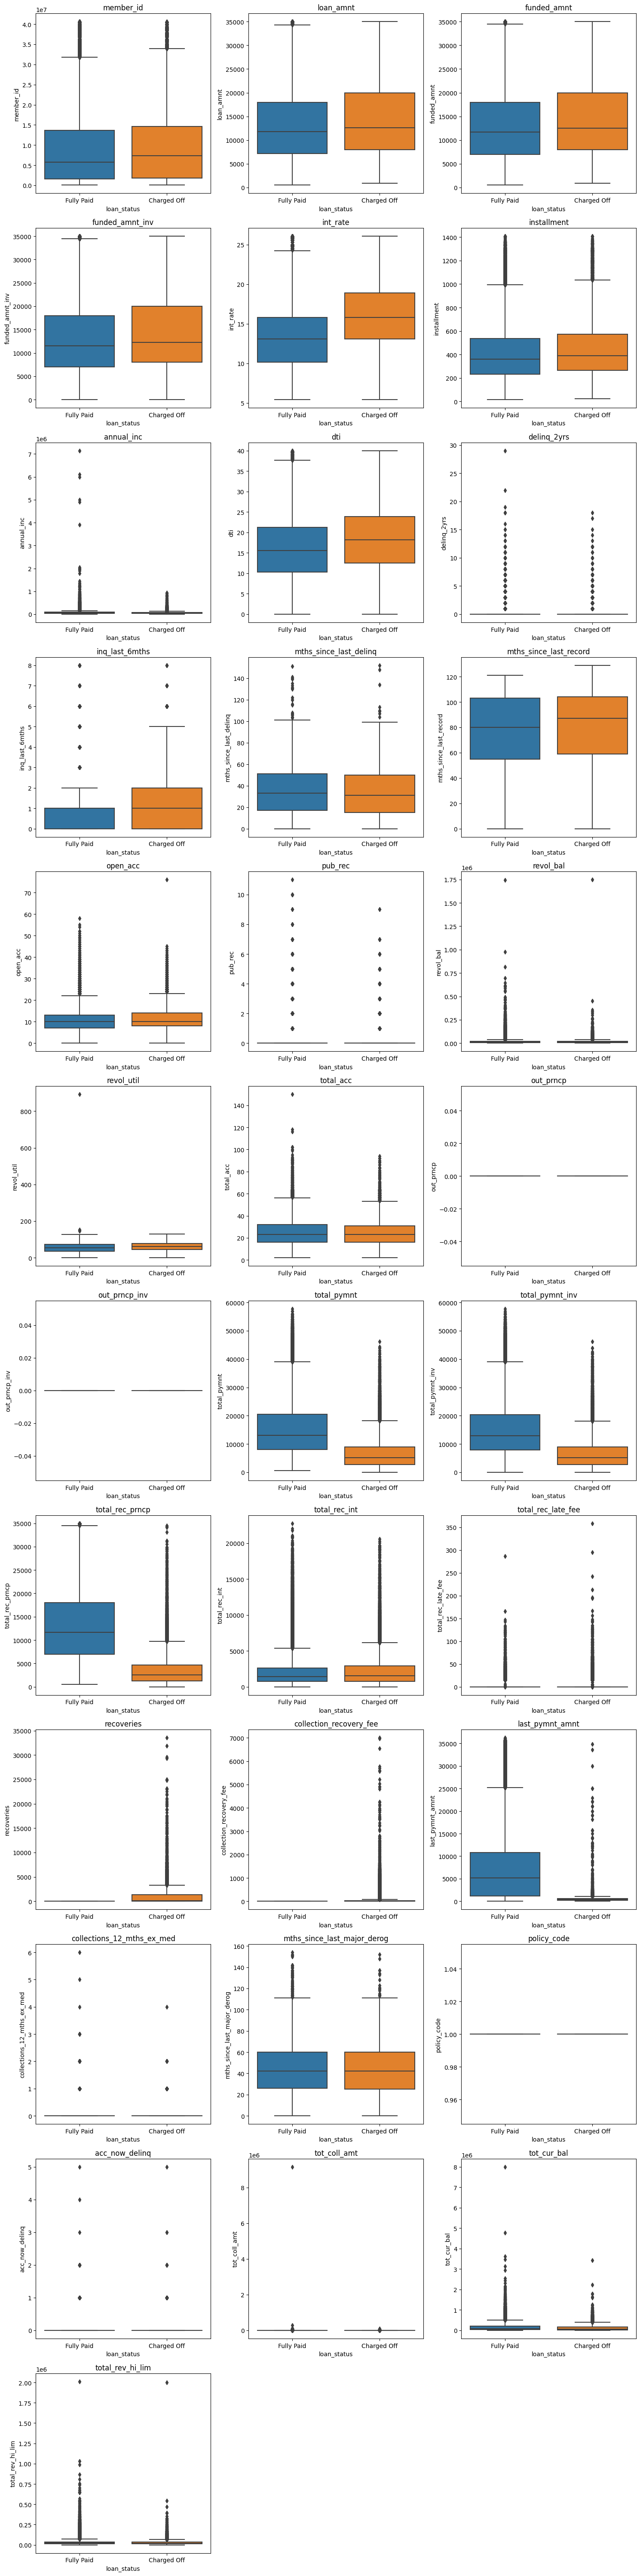

In [21]:
# Get the names of all columns with data type 'int'
int_vars = df4.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='loan_status', data=df4, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

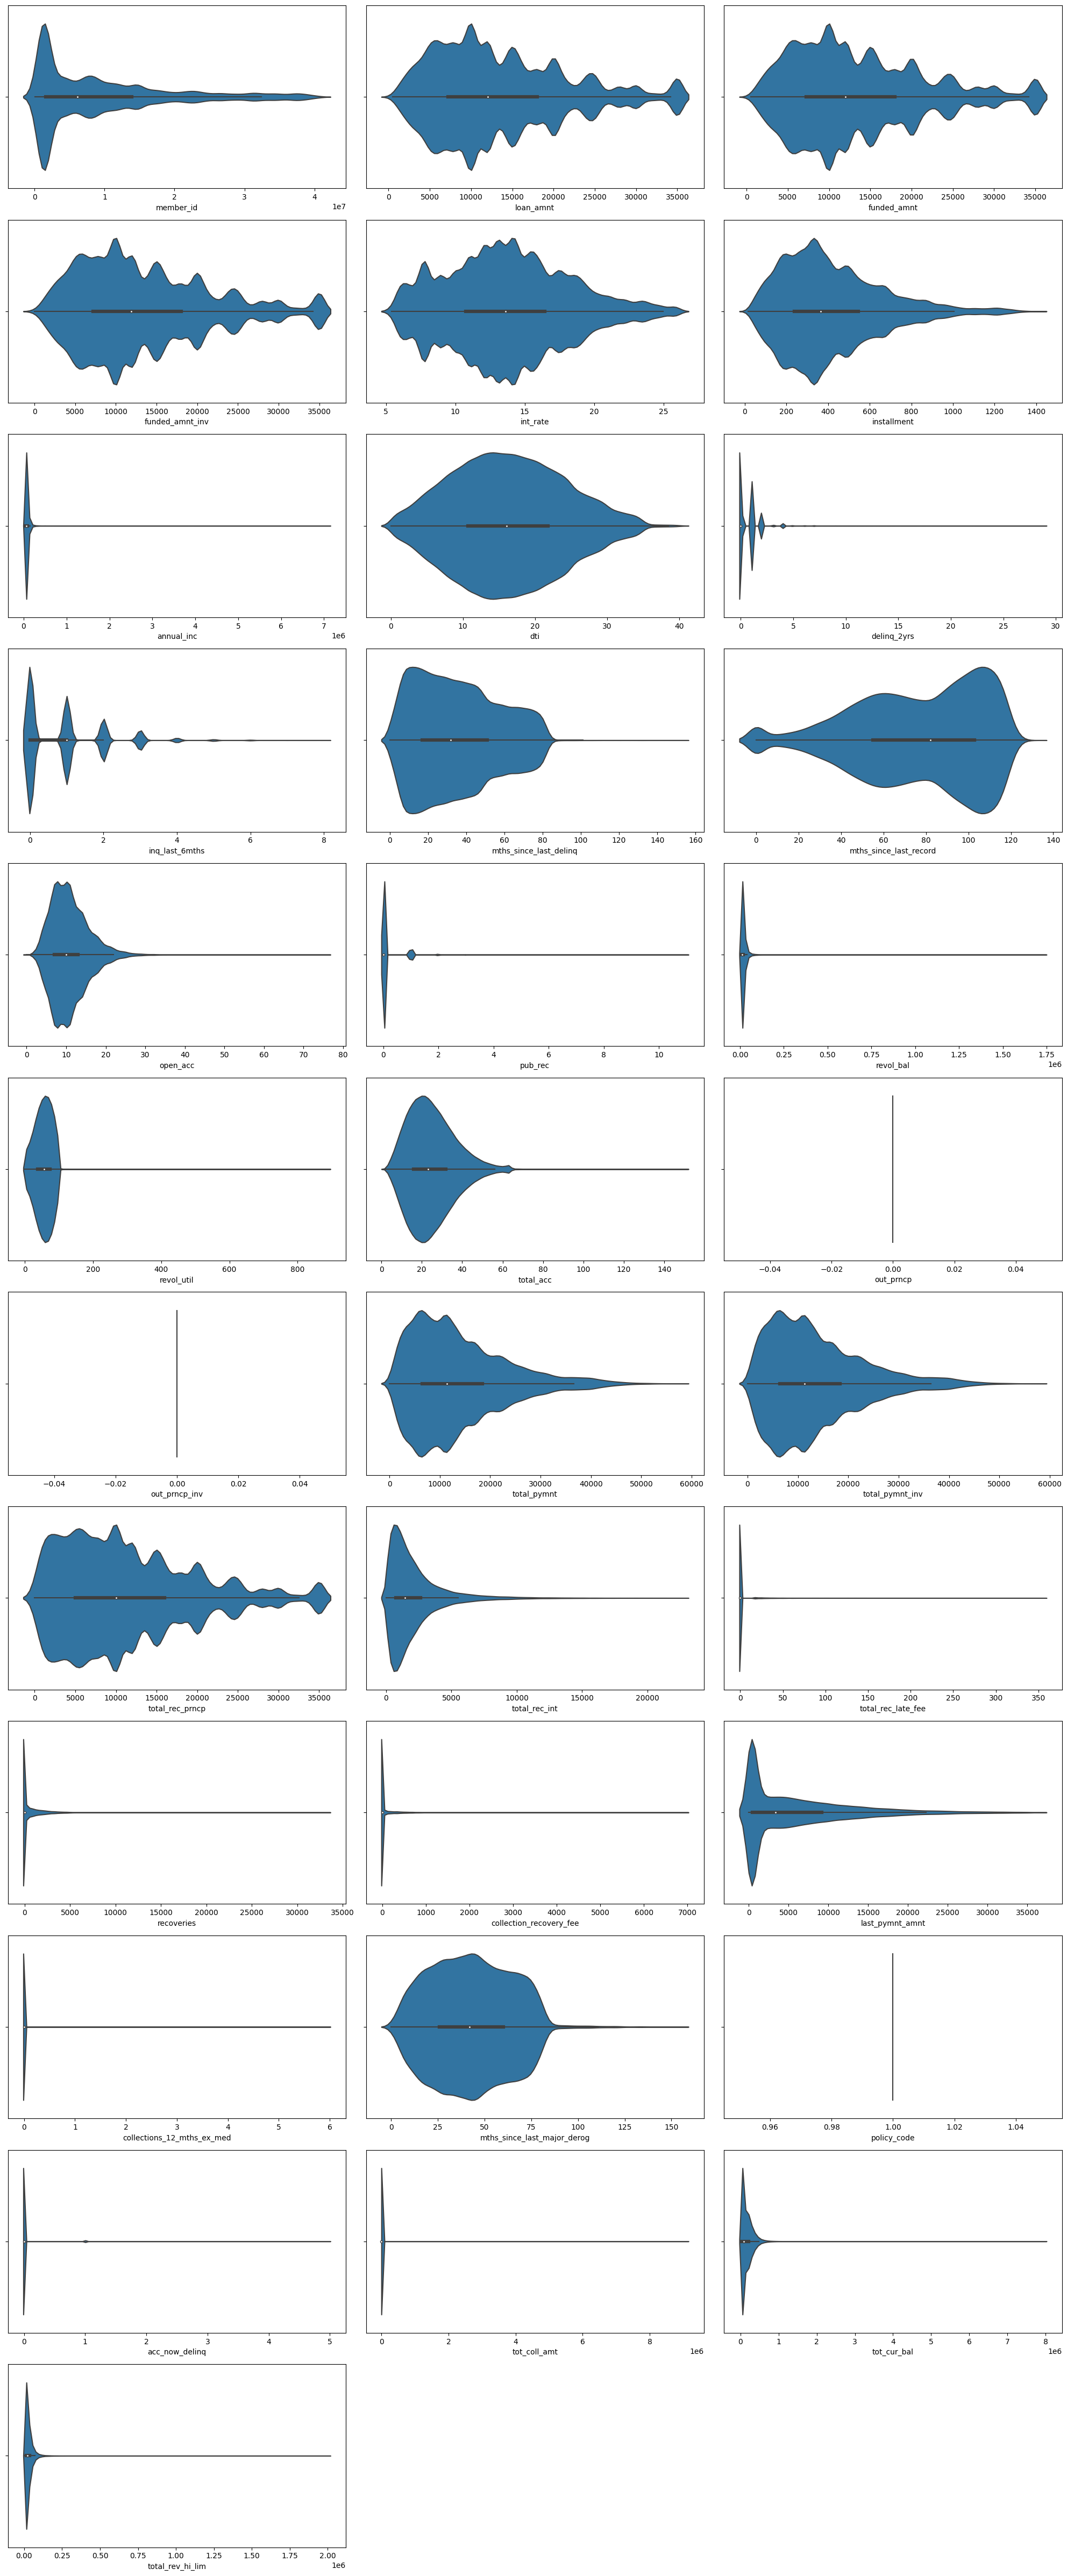

In [22]:
# Select columns with int or float data types
num_vars = df4.select_dtypes(include=['int', 'float']).columns.tolist()

# Create subplots
num_rows = (len(num_vars) + 4) // 3  # Adjust the number of rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4*num_rows))
axs = axs.flatten()

# Create violin plots for numeric columns
for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df4, ax=axs[i])

# Remove any extra empty subplots if needed
if len(num_vars) < len(axs):
    for i in range(len(num_vars), len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

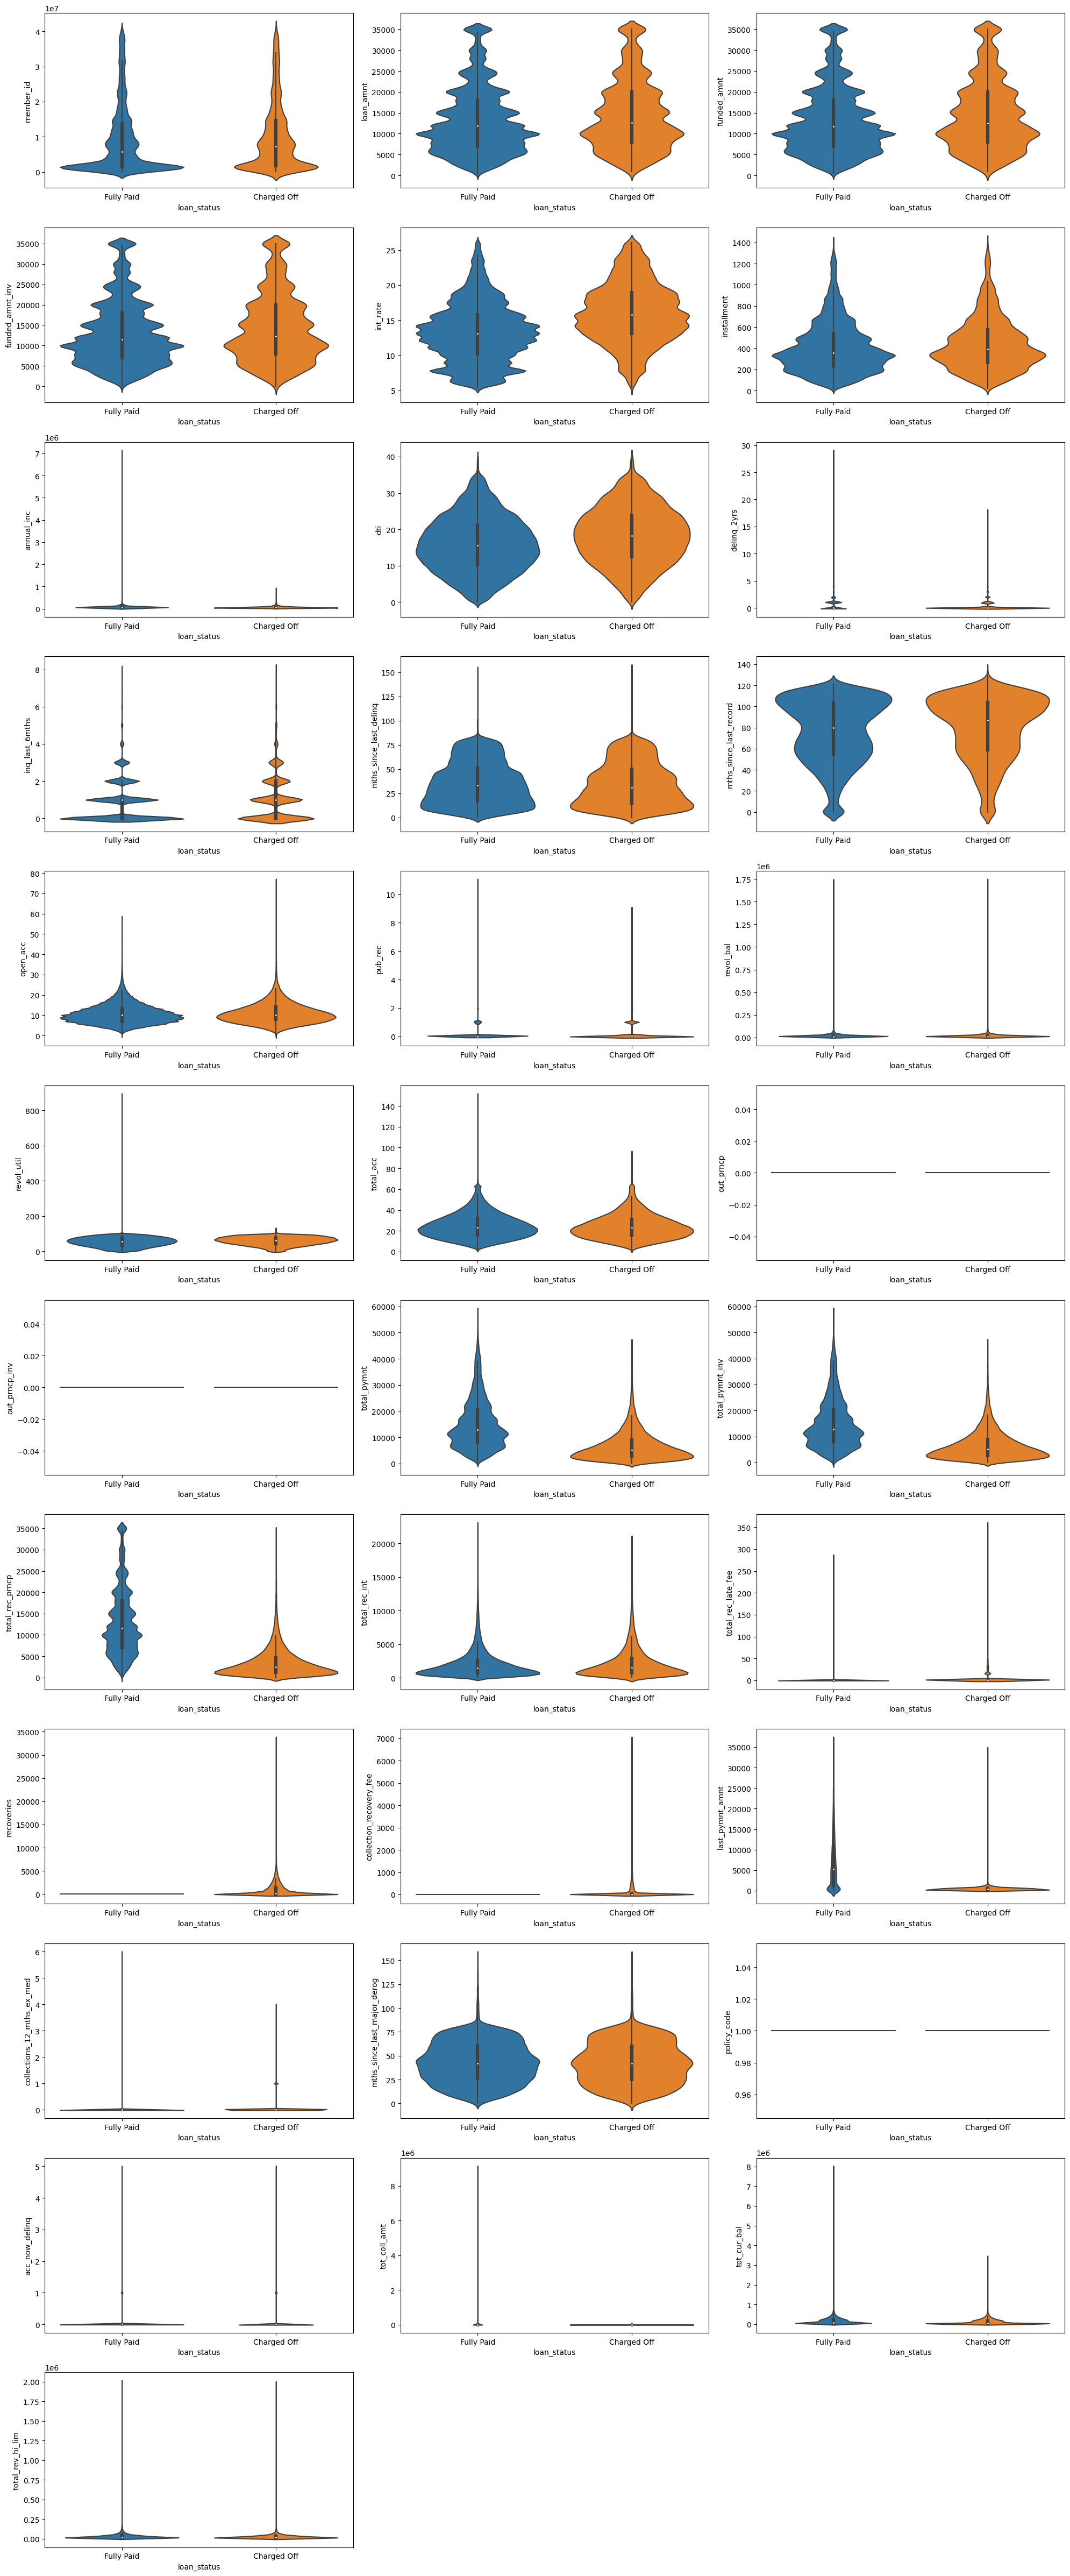

In [23]:
# Select columns with int or float data types
num_vars = df4.select_dtypes(include=['int', 'float']).columns.tolist()

# Create subplots
num_rows = (len(num_vars) + 4) // 3  # Adjust the number of rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4*num_rows))
axs = axs.flatten()

# Create violin plots for numeric columns against 'Response'
for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df4, x='loan_status', ax=axs[i])

# Remove any extra empty subplots if needed
if len(num_vars) < len(axs):
    for i in range(len(num_vars), len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

## Data Preprocessing after EDA

### Handling Missing Values

In [24]:
#Check missing value
check_missing = df4.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

next_pymnt_d                   48.728567
mths_since_last_record         43.014251
mths_since_last_major_derog    40.146262
mths_since_last_delinq         27.463676
tot_coll_amt                   13.662889
tot_cur_bal                    13.662889
total_rev_hi_lim               13.662889
emp_length                      1.860021
last_pymnt_d                    0.078064
revol_util                      0.039890
collections_12_mths_ex_med      0.012010
dtype: float64

In [25]:
# Drop some column that has the most missing value (<10%)
df4.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_major_derog',
                 'mths_since_last_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace=True)
df4.shape

(227214, 39)

In [26]:
# Drop the rest missing value
df4.dropna(inplace=True)
df4.shape

(217971, 39)

In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217971 entries, 0 to 466283
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   member_id                   217971 non-null  int64         
 1   loan_amnt                   217971 non-null  int64         
 2   funded_amnt                 217971 non-null  int64         
 3   funded_amnt_inv             217971 non-null  float64       
 4   term                        217971 non-null  object        
 5   int_rate                    217971 non-null  float64       
 6   installment                 217971 non-null  float64       
 7   grade                       217971 non-null  object        
 8   sub_grade                   217971 non-null  object        
 9   emp_length                  217971 non-null  object        
 10  home_ownership              217971 non-null  object        
 11  annual_inc                  217971 non-null 

### Removing Unnecessary Features

In [28]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df4.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df4[col].unique()}")

term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'C2' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']
emp_length: ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
loan_status: ['Fully Paid' 'Charged Off']
pymnt_plan: ['n' 'y']
purpose: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
initial_list_status: ['f' 'w']


In [29]:
# Drop some column that has the unnecessary features
df4.drop(columns=['sub_grade'], inplace=True)
df4.shape

(217971, 38)

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217971 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   member_id                   217971 non-null  int64         
 1   loan_amnt                   217971 non-null  int64         
 2   funded_amnt                 217971 non-null  int64         
 3   funded_amnt_inv             217971 non-null  float64       
 4   term                        217971 non-null  object        
 5   int_rate                    217971 non-null  float64       
 6   installment                 217971 non-null  float64       
 7   grade                       217971 non-null  object        
 8   emp_length                  217971 non-null  object        
 9   home_ownership              217971 non-null  object        
 10  annual_inc                  217971 non-null  float64       
 11  verification_status         217971 non-null 

In [31]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df4.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df4[col].unique()}")

term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
emp_length: ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
loan_status: ['Fully Paid' 'Charged Off']
pymnt_plan: ['n' 'y']
purpose: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
initial_list_status: ['f' 'w']


### Handling Duplicated Values

In [32]:
df4.duplicated().sum()

0

There's no need for handling duplicated values because the data doesn't have duplicated values.

### Feature Extraction

Assuming the last date the data updated is maximum value of **last_pymnt_d**, I can extract how many days since the last loan payment received. Value stored in **loan_pymnt_diff** column and drop **last_pymnt_d** column.

In [33]:
df4['loan_pymnt_diff'] = max(df4['last_pymnt_d']) - df4['last_pymnt_d']
df4['loan_pymnt_diff'] = df4['loan_pymnt_diff'].dt.days
df4 = df4.drop(columns='last_pymnt_d')

### Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scale = StandardScaler()#MinMaxScaler()
column_all = df4.select_dtypes(include=["int", "float"]).columns.tolist() 
for column in column_all:
    df4[column] = scale.fit_transform(np.array(df4[column]).reshape(-1,1))
df4.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  2.179710e+05  2.179710e+05  2.179710e+05     2.179710e+05   
mean  -7.927843e-17  5.424314e-17 -7.823530e-17     2.613059e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00     1.000002e+00   
min   -9.458073e-01 -1.623157e+00 -1.622623e+00    -1.667529e+00   
25%   -7.899646e-01 -7.541389e-01 -7.508031e-01    -7.731580e-01   
50%   -3.388295e-01 -1.954842e-01 -1.903477e-01    -1.800159e-01   
75%    4.573394e-01  5.773213e-01  5.569261e-01     5.683989e-01   
max    3.172492e+00  2.659862e+00  2.674202e+00     2.680109e+00   

           int_rate   installment    annual_inc           dti   delinq_2yrs  \
count  2.179710e+05  2.179710e+05  2.179710e+05  2.179710e+05  2.179710e+05   
mean   9.023137e-17 -3.212863e-16  1.288275e-16 -6.686510e-16  5.528628e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.903927e+00 -1.657594e+00 -1.235179e+00 -2.136831e+00 -3.368883e-01   
25%   -6.897803e-01 -7.265002e-01 -5.010855e-01 -7.431630e-01 -3.368883e-01   
50%   -5.303796e-02 -2.131327e-01 -1.788004e-01 -4.044024e-02 -3.368883e-01   
75%    5.837044e-01  5.262692e-01  2.688177e-01  7.054666e-01 -3.368883e-01   
max    2.806597e+00  4.055589e+00  1.265648e+02  3.096294e+00  3.972189e+01   

       inq_last_6mths  ...  total_rec_prncp  total_rec_int  \
count    2.179710e+05  ...     2.179710e+05   2.179710e+05   
mean     5.580784e-17  ...    -1.538627e-16   4.068235e-17   
std      1.000002e+00  ...     1.000002e+00   1.000002e+00   
min     -8.078627e-01  ...    -1.397889e+00  -9.911247e-01   
25%     -8.078627e-01  ...    -7.892974e-01  -6.412811e-01   
50%      1.227506e-01  ...    -1.807056e-01  -3.062216e-01   
75%      1.227506e-01  ...     5.496046e-01   2.666320e-01   
max      6.637044e+00  ...     2.862257e+00   9.699230e+00   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        2.179710e+05  2.179710e+05             2.179710e+05   
mean        -8.579804e-17  5.945882e-17             1.981961e-17   
std          1.000002e+00  1.000002e+00             1.000002e+00   
min         -1.363766e-01 -2.229981e-01            -1.512290e-01   
25%         -1.363766e-01 -2.229981e-01            -1.512290e-01   
50%         -1.363766e-01 -2.229981e-01            -1.512290e-01   
75%         -1.363766e-01 -2.229981e-01            -1.512290e-01   
max          6.299469e+01  4.310943e+01             5.908759e+01   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count     2.179710e+05                2.179710e+05     217971.0   
mean      5.215686e-17                1.095294e-17          0.0   
std       1.000002e+00                1.000002e+00          0.0   
min      -8.611086e-01               -6.967635e-02          0.0   
25%      -7.943025e-01               -6.967635e-02          0.0   
50%      -3.604265e-01               -6.967635e-02          0.0   
75%       4.783376e-01               -6.967635e-02          0.0   
max       4.348918e+00                6.207199e+01          0.0   

       acc_now_delinq  loan_pymnt_diff  
count    2.179710e+05     2.179710e+05  
mean     5.215686e-18     3.546667e-17  
std      1.000002e+00     1.000002e+00  
min     -4.818264e-02    -1.201207e+00  
25%     -4.818264e-02    -7.509569e-01  
50%     -4.818264e-02    -3.080480e-01  
75%     -4.818264e-02     4.407372e-01  
max      8.674865e+01     5.948958e+00  

[8 rows x 29 columns]

### Feature Encoding

In [35]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df4.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df4[col].unique())

    # Transform the column using the encoder
    df4[col] = label_encoder.transform(df4[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df4[col].unique()}")

term: [0 1]
grade: [1 2 0 4 5 3 6]
emp_length: [ 1 10  3  9  4  5  0  6  2  7  8]
home_ownership: [5 4 1 3 2 0]
verification_status: [2 1 0]
loan_status: [1 0]
pymnt_plan: [0 1]
purpose: [ 1  0 11  9 13  2  4  6  7  8 12  5 10  3]
initial_list_status: [0 1]


<Axes: >

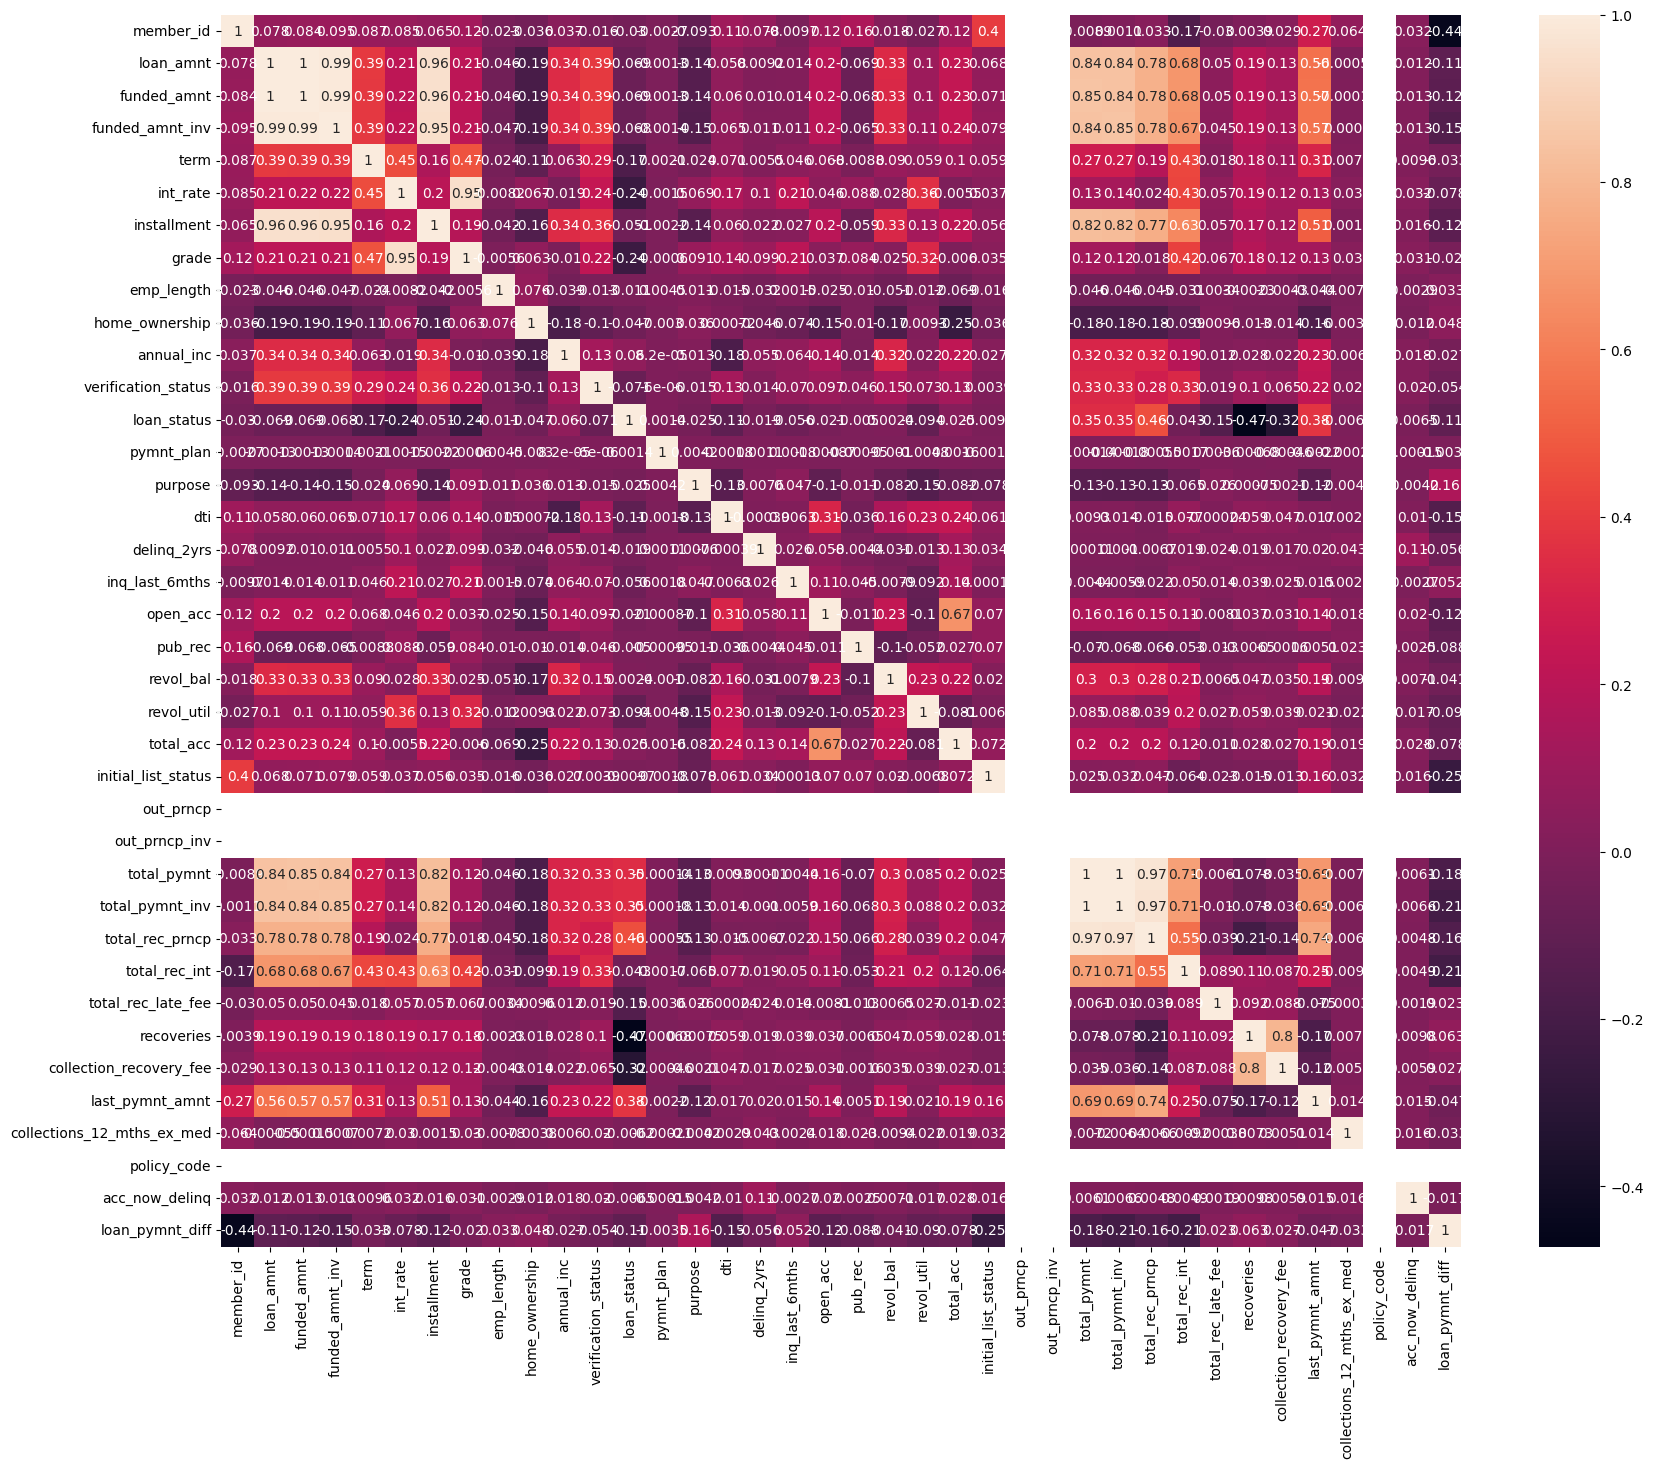

In [36]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df4.corr(), fmt='.2g', annot=True)

In [37]:
# Drop redundant column and target column
redundant = ['out_prncp', 'out_prncp_inv', 'policy_code', 
             'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
             'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee']
df4.drop(columns=redundant, inplace=True)
df4.shape

(217971, 28)

<Axes: >

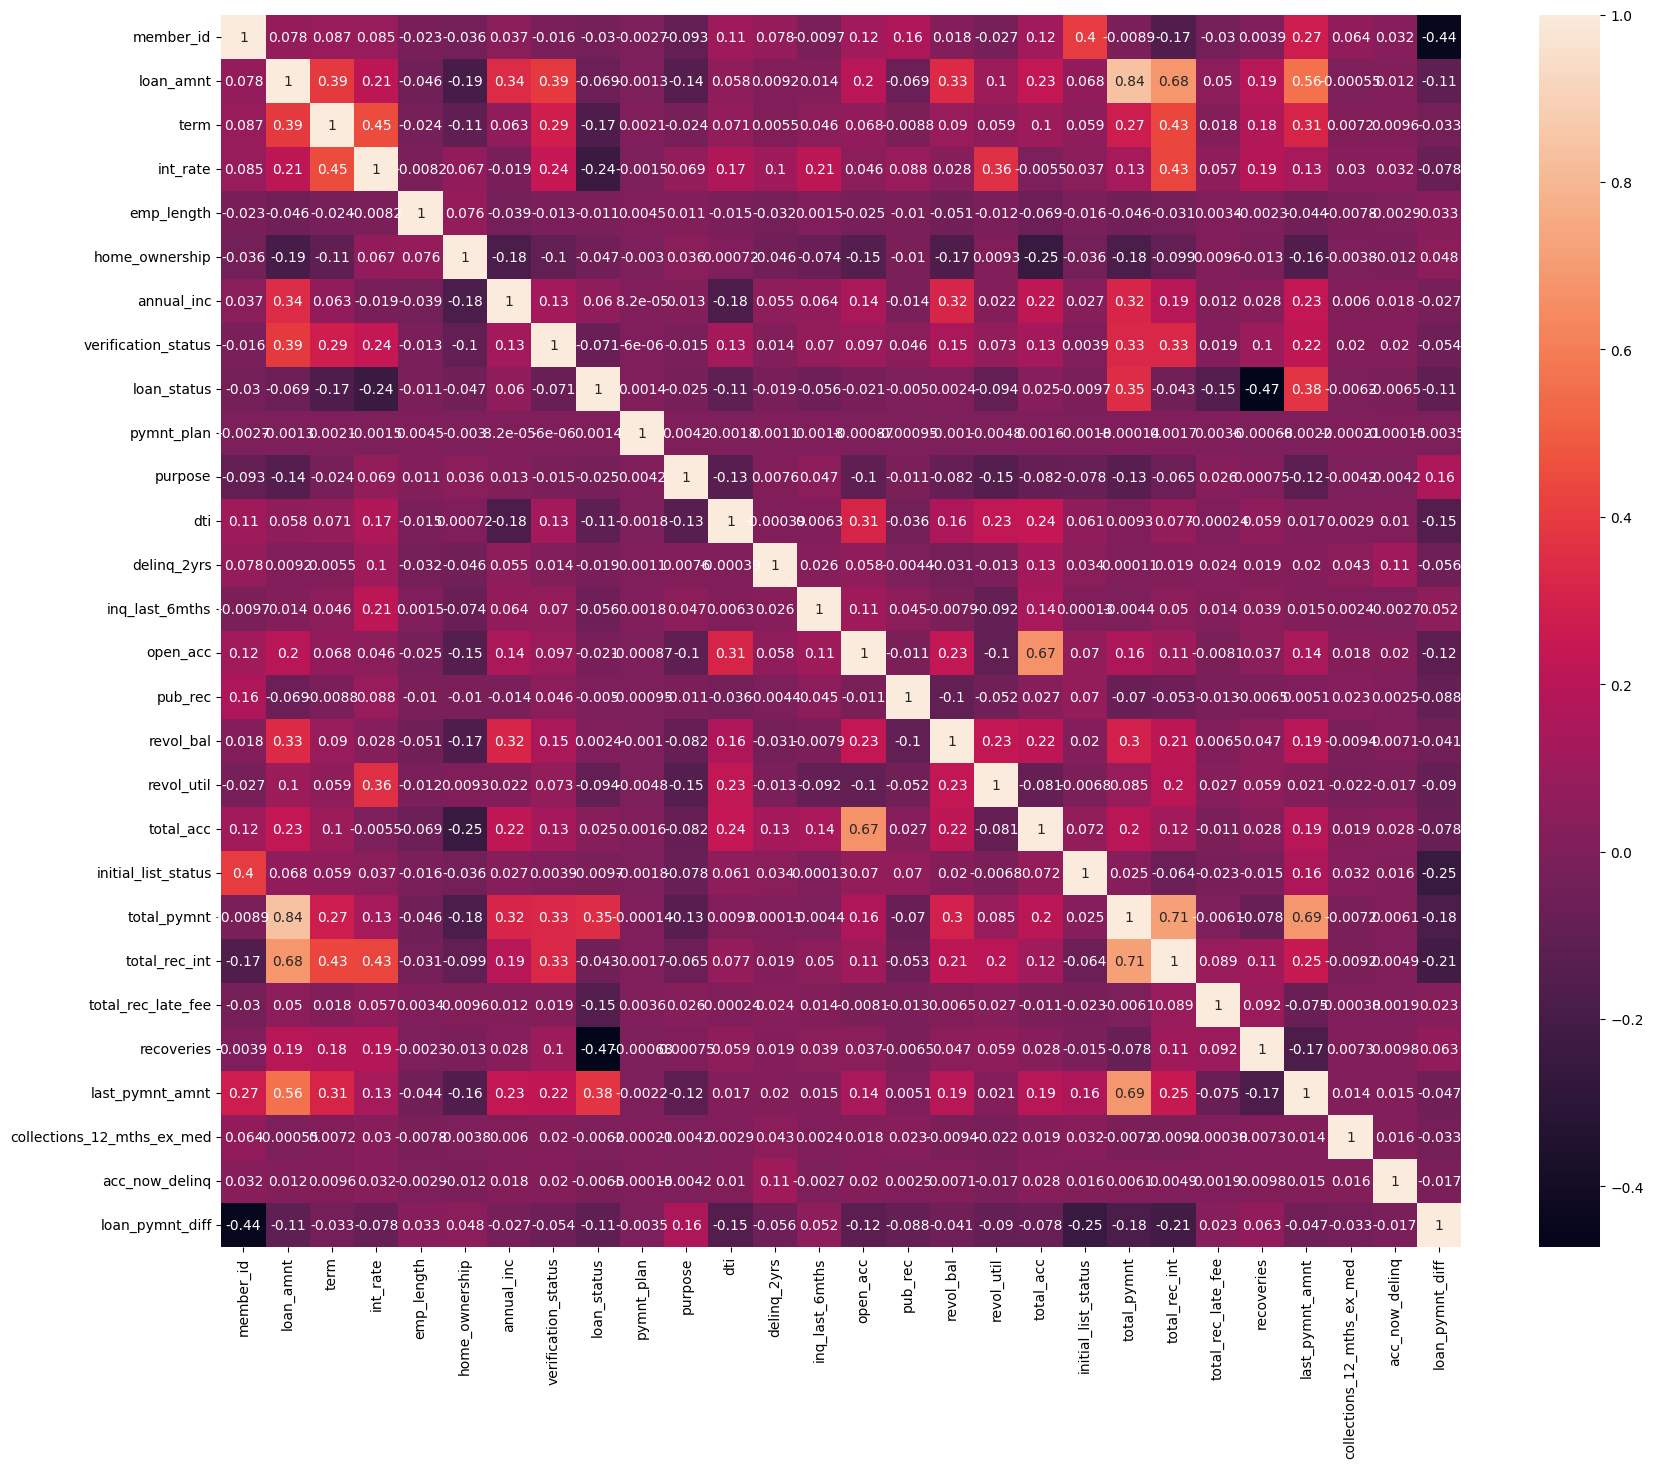

In [38]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df4.corr(), fmt='.2g', annot=True)

## Train Test Split

In [39]:
# Select the features (X) and the target variable (y)
X = df4.drop(columns='loan_status')
y = df4['loan_status']
print(X.shape)
print(y.shape)

(217971, 27)
(217971,)


In [40]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=727)

### Handling Class Imbalance on Data Training

In [41]:
# Reached.on.Time_Y.N Feature unique values sum after data split train/test
print(f'Value counts loan_status column:')
print(pd.Series(y_train).value_counts())

total = pd.Series(y_train).value_counts().sum()

print(f'''Reached on time: No percentage: {round(pd.Series(y_train).value_counts()[0]/total * 100, 2)}%''')
print(f'''Reached on time: Yes percentage: {round(pd.Series(y_train).value_counts()[1]/total * 100, 2)}%''')

Value counts loan_status column:
loan_status
1    142548
0     31828
Name: count, dtype: int64
Reached on time: No percentage: 18.25%
Reached on time: Yes percentage: 81.75%


In [42]:
#---handling imbalance class with SMOTE---
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler instance
under_sampler = RandomUnderSampler(random_state=727)

# Apply random undersampling to balance the classes
X_under_SMOTE, y_under_SMOTE = under_sampler.fit_resample(X, y)

In [43]:
print('Original (y Train)')
print(pd.Series(y_train).value_counts())
print('\n')
print('y SMOTE')
print(pd.Series(y_under_SMOTE).value_counts())
print('\n')
print('Original (X Train)')
print(X_train.shape)
print('\n')
print('X SMOTE')
print(X_under_SMOTE.shape)

Original (y Train)
loan_status
1    142548
0     31828
Name: count, dtype: int64


y SMOTE
loan_status
0    39768
1    39768
Name: count, dtype: int64


Original (X Train)
(174376, 27)


X SMOTE
(79536, 27)


## Modelling

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.utils import compute_sample_weight
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("")
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    
def eval_cv_ab_roc_auc(model):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def weighted_sample(y):
    class_weights = compute_sample_weight(class_weight={0: 1, 1: 2}, y=y)  # Calculate sample weights based on class imbalance
    return class_weights

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification2(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("")
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_under_SMOTE, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def eval_cv_ab_roc_auc2(model):
    score = cross_validate(model, X_under_SMOTE, y_under_SMOTE, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

import warnings
warnings.filterwarnings('ignore')


### **Random Forest**			

#### Without SMOTE

In [46]:
from sklearn.ensemble import RandomForestClassifier# import decision tree dari sklearn

rfc = RandomForestClassifier(random_state=727) # inisiasi object dengan nama rfc
rfc.fit(X_train, y_train)
eval_classification(rfc)
eval_cv_ab_roc_auc(rfc)

# Show feature importance
# show_feature_importance(rfc.best_estimator_)

Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00

roc_auc (train-proba): 1.00
roc_auc (test-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9994579496956078


#### With SMOTE

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00

roc_auc (train-proba): 1.00
roc_auc (test-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9969753276764017


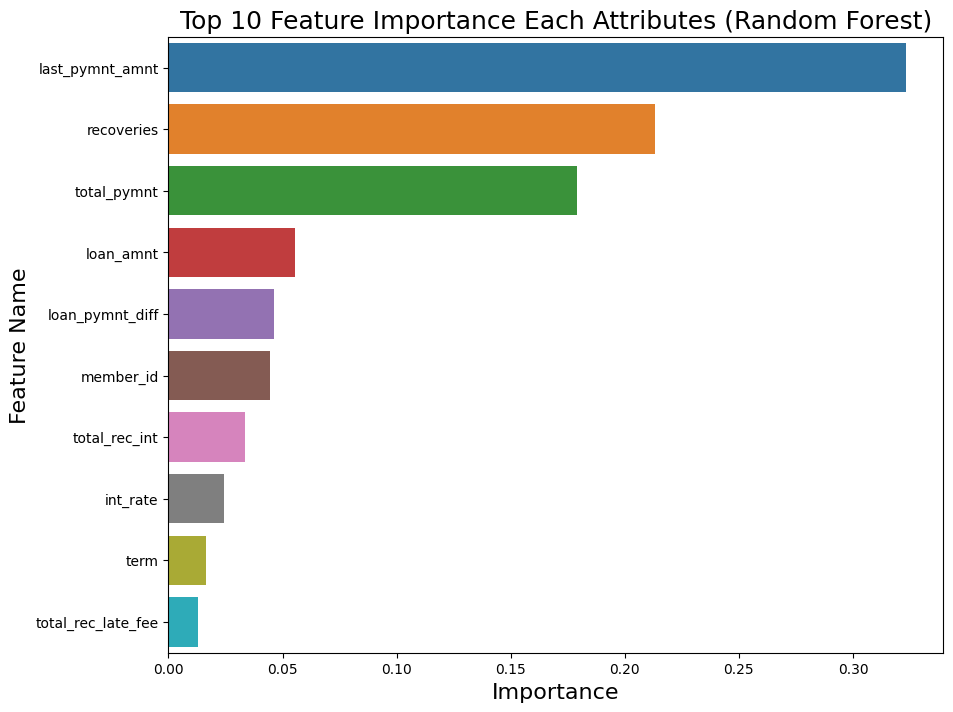

In [47]:
from sklearn.ensemble import RandomForestClassifier# import decision tree dari sklearn

rfc = RandomForestClassifier(random_state=727) # inisiasi object dengan nama dt
rfc.fit(X_under_SMOTE, y_under_SMOTE)
eval_classification2(rfc)
eval_cv_ab_roc_auc2(rfc)

# Show feature importance
imp_df = pd.DataFrame({
    "Feature Name": X_under_SMOTE.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9990136483541691')

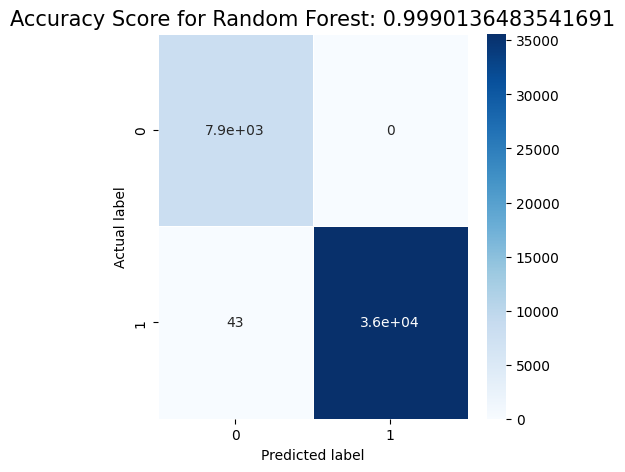

In [54]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

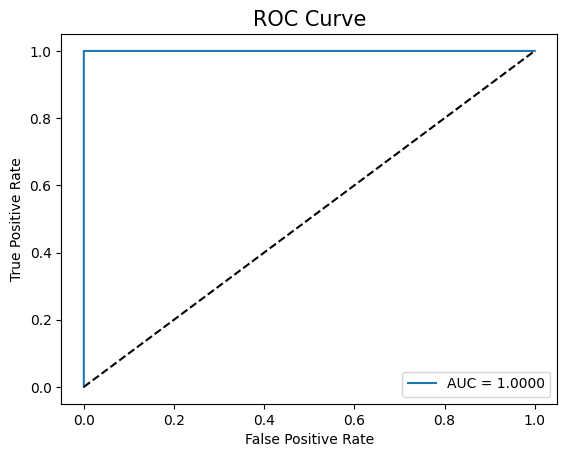

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### **Decision Tree**			

#### Without SMOTE

In [60]:
from sklearn.tree import DecisionTreeClassifier# import decision tree dari sklearn

dt = DecisionTreeClassifier(random_state=727) # inisiasi object dengan nama dt
dt.fit(X_train, y_train)
eval_classification(dt)
eval_cv_ab_roc_auc(dt)

# Show feature importance
# show_feature_importance(dt.best_estimator_)

Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9888396806097001


#### With SMOTE

Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.99
F1-Score (Test Set): 1.00

roc_auc (train-proba): 1.00
roc_auc (test-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9168157525664435


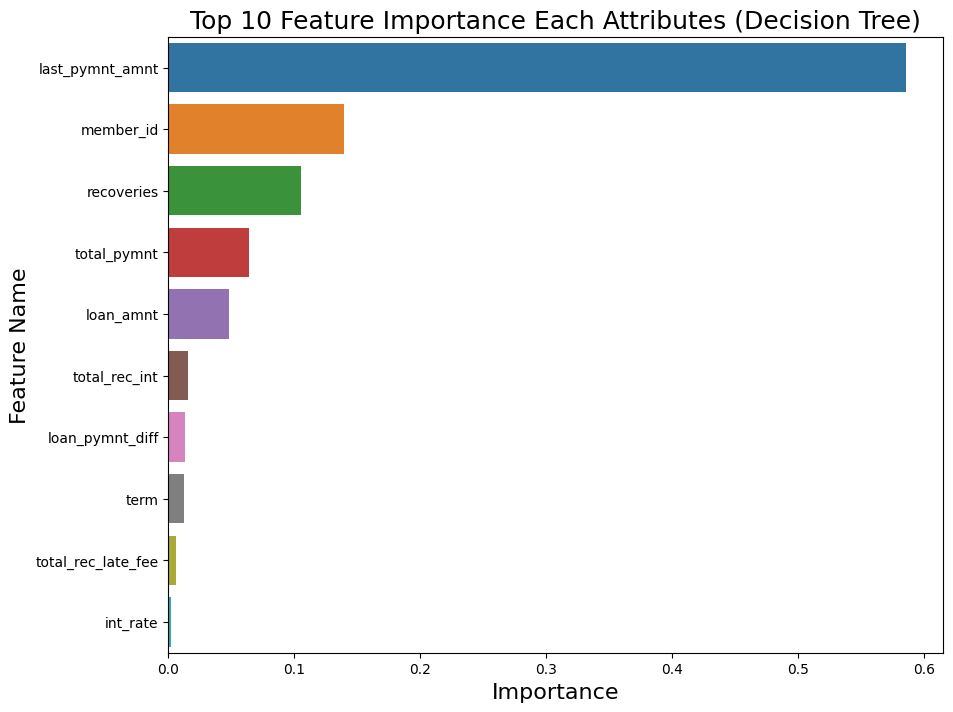

In [61]:
from sklearn.tree import DecisionTreeClassifier# import decision tree dari sklearn

dt = DecisionTreeClassifier(random_state=727) # inisiasi object dengan nama dt
dt.fit(X_under_SMOTE, y_under_SMOTE)
eval_classification2(dt)
eval_cv_ab_roc_auc2(dt)

# Show feature importance
imp_df = pd.DataFrame({
    "Feature Name": X_under_SMOTE.columns,
    "Importance": dt.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()
# Show feature importance
# show_feature_importance(dt.best_estimator_)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9918798027296708')

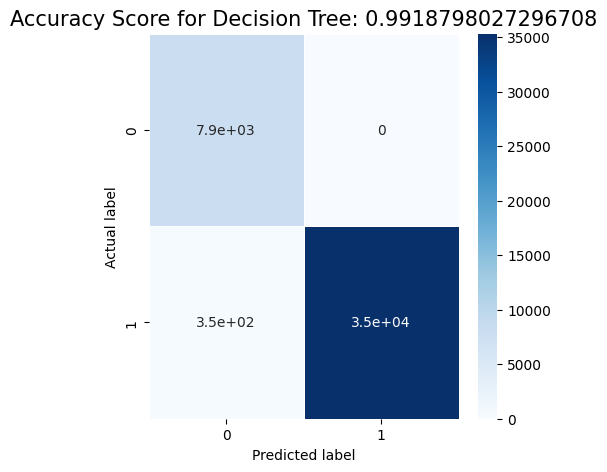

In [62]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

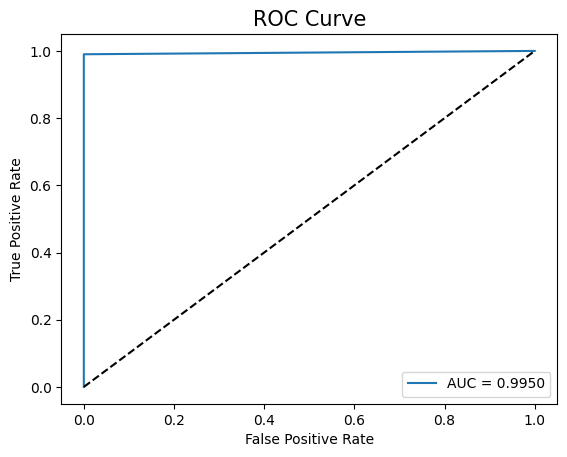

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dt.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()